# Boosting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import CleaningCars as cc

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df=pd.read_csv('vehicles.csv')

In [3]:
df=cc.ultimateClean(df)

Remove outliers...
Remove outliers...
Cleaned outliers !
Imputed Missing Values
One hot encodings done!
Total Time:  7.492690292994181  minutes


In [4]:
from sklearn.preprocessing import StandardScaler

#Standardise features
cols_to_norm = ['year','odometer','lat','long']

df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])

In [5]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.20, random_state=42)

In [6]:
X_train=df_train.drop("price",axis=1)
y_train=df_train['price']

X_test=df_test.drop("price",axis=1)
y_test=df_test['price']

In [6]:
#X.shape

(388335, 102)

In [7]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# XGboost

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor()

params={"learning_rate":[0.01, 0.05, 0.1,0.3, 0.5],
       "alpha":[5,10,15,20,25],
       "max_depth":[5,10,20,30,35,40, 45],
       "n_estimators":[100,150,200,500,1000]}

random_search = RandomizedSearchCV(model, param_distributions=params, scoring='neg_mean_squared_error', n_jobs=4, cv=5 )

random_search.fit(X_train, y_train)

print(random_search.best_params_)

In [7]:
import xgboost as xgb

model = xgb.XGBRegressor(learning_rate = 0.1, 
                           max_depth = 20, 
                           alpha = 10, 
                           n_estimators = 200)

model.fit(X_train,y_train)
preds_train= model.predict(X_train)
preds_test = model.predict(X_test)


print(f"MSE on train set: {mean_squared_error(y_train, preds_train)}")
print(f"RMSE on train set: {mean_squared_error(y_train, preds_train)**0.5}")
print()
print(f"MSE on test set:  {mean_squared_error(y_test, preds_test)}")
print(f"RMSE on test set:  {mean_squared_error(y_test, preds_test)**0.5}")

MSE on train set: 1681400.0488783927
RMSE on train set: 1296.6881077878338

MSE on test set:  18506914.684563376
RMSE on test set:  4301.966374178601


MSE on train set: 1681400.0488783927
RMSE on train set: 1296.6881077878338

MSE on test set:  18506914.684563376
RMSE on test set:  4301.966374178601

In [ ]:
from sklearn.model_selection import cross_val_score

model = xgb.XGBRegressor(learning_rate = 0.1, 
                           max_depth = 20, 
                           alpha = 10, 
                           n_estimators = 200)

cv_score=cross_val_score(model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")


print(cv_score)
print("RMSE CV:", -np.mean(cv_score))

[-4539.40832934 -4530.79744298 -4562.29798048 -4540.67763391
 -4538.37326659]
RMSE CV: 4542.3109306609185

In [8]:
#Set the lowest predicted value to zero (negative predicted values make no sense for price)
import copy

preds_train2 = copy.copy(preds_train)
preds_test2 = copy.copy(preds_test)

preds_train2[preds_train2 < 0] = 0
preds_test2[preds_test2 < 0] = 0

print(f"MSE on train set: {mean_squared_error(y_train, preds_train2)}")
print(f"RMSE on train set: {mean_squared_error(y_train, preds_train2)**0.5}")
print()
print(f"MSE on test set:  {mean_squared_error(y_test, preds_test2)}")
print(f"RMSE on test set:  {mean_squared_error(y_test, preds_test2)**0.5}")

MSE on train set: 1680198.6649892374
RMSE on train set: 1296.224774099476

MSE on test set:  18494230.29625137
RMSE on test set:  4300.491866781214


MSE on train set: 1680198.6649892374
RMSE on train set: 1296.224774099476

MSE on test set:  18494230.29625137
RMSE on test set:  4300.491866781214

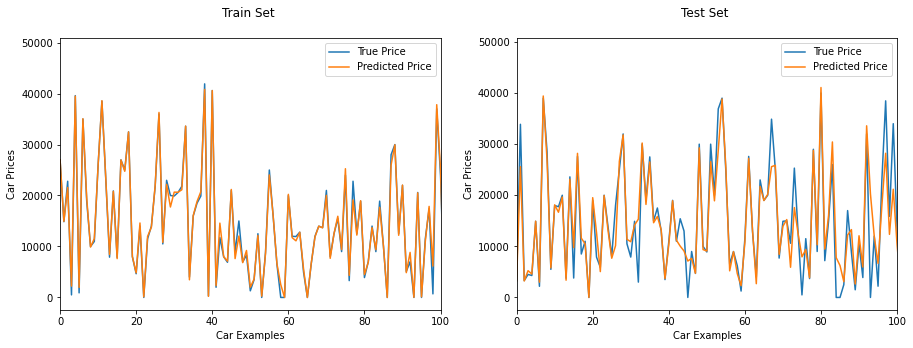

In [10]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].plot(np.arange(len(y_train)), y_train, label='True Price')
ax[0].plot(np.arange(len(preds_train2)), preds_train2, label='Predicted Price')
ax[0].set_title("Train Set \n")
ax[0].set_xlabel("Car Examples")
ax[0].set_ylabel("Car Prices")
ax[0].set_xlim(0,100)
#ax[0].set_ylim(0,35)
ax[0].legend()

ax[1].plot(np.arange(len(y_test)), y_test, label='True Price')
ax[1].plot(np.arange(len(preds_test2)), preds_test2, label='Predicted Price')
ax[1].set_title("Test Set \n")
ax[1].set_xlabel("Car Examples")
ax[1].set_ylabel("Car Prices")
ax[1].set_xlim(0,100)
#ax[1].set_ylim(0,35)
ax[1].legend()

plt.show()

Where the model goes wrong

In [15]:
df_test

,price,year,condition,odometer,lat,long,color_black,color_other,color_silver,color_white,...,manuf_country_USA,manuf_country_missing,tfidf_0,tfidf_2,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9
232817,3300,-0.436226,1,1.325723,0.499776,1.119322,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
347179,33875,0.746197,1,-1.248501,1.699802,-1.557645,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
232734,3300,-0.436226,1,1.325723,0.499776,1.119322,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
12624,4500,-0.304846,1,0.495472,-1.111524,-0.927588,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
207309,4295,-0.830367,1,0.887746,-0.491042,0.885366,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340476,0,-0.042085,1,0.217182,-0.300834,1.000259,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
22408,14990,-0.042085,1,-0.171675,-0.844861,0.545067,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18621,0,0.483436,1,-0.427925,-0.774315,-1.339312,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
217730,8995,0.614816,1,-0.789534,0.268754,1.112376,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
def prepare(df):
    X = df.drop("price", axis = 1)
    y = df["price"]
    return(X, y)

def catMSE(col):
    df_cat = df_test[(df_test[col] == 1)]
    X_cat, y_cat = prepare(df_cat)
    preds_cat = model.predict(X_cat)
    preds_cat[preds_cat<0]=0
    return(mean_squared_error(preds_cat, y_cat))

def catPREDS(col):
    df_cat = df_test[(df_test[col] == 1)]
    X_cat, y_cat = prepare(df_cat)
    preds_cat = model.predict(X_cat)
    preds_cat[preds_cat<0]=0
    return y_cat, preds_cat

In [17]:
mylist = df.drop(["price", "year" , "odometer", "lat", "long", 'tfidf_0', 'tfidf_2', 'tfidf_4', 'tfidf_5',
       'tfidf_6', 'tfidf_7', 'tfidf_8', 'tfidf_9'],axis=1).columns
mylist

Index(['condition', 'color_black', 'color_other', 'color_silver',
       'color_white', 'drive_4wd', 'drive_fwd', 'drive_other', 'drive_rwd',
       'transmission_automatic', 'transmission_manual', 'transmission_other',
       'status_clean', 'status_lien', 'status_missing', 'status_parts only',
       'status_rebuilt', 'status_salvage', 'state_ak', 'state_al', 'state_ar',
       'state_az', 'state_ca', 'state_co', 'state_ct', 'state_dc', 'state_de',
       'state_fl', 'state_ga', 'state_hi', 'state_ia', 'state_id', 'state_il',
       'state_in', 'state_ks', 'state_ky', 'state_la', 'state_ma', 'state_md',
       'state_me', 'state_mi', 'state_mn', 'state_mo', 'state_ms', 'state_mt',
       'state_nc', 'state_nd', 'state_ne', 'state_nh', 'state_nj', 'state_nm',
       'state_nv', 'state_ny', 'state_oh', 'state_ok', 'state_or', 'state_pa',
       'state_ri', 'state_sc', 'state_sd', 'state_tn', 'state_tx', 'state_ut',
       'state_va', 'state_vt', 'state_wa', 'state_wi', 'state_wv', 'sta

MSE on condition predictions is 4320.313021422963


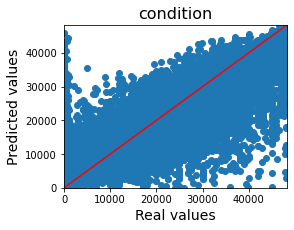

MSE on color_black predictions is 4369.900809166037


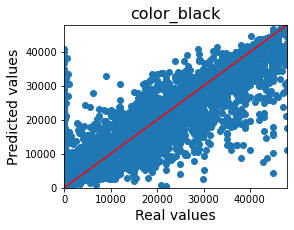

MSE on color_other predictions is 4368.222332559201


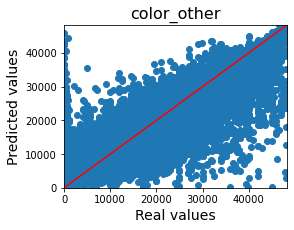

MSE on color_silver predictions is 3727.5630706287056


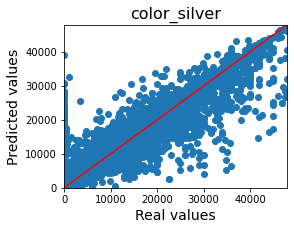

MSE on color_white predictions is 4359.25894239997


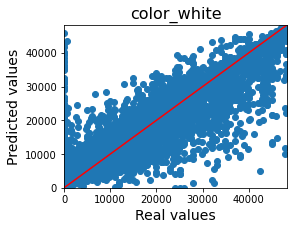

MSE on drive_4wd predictions is 4879.214840070532


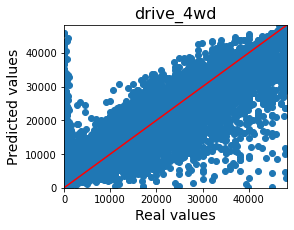

MSE on drive_fwd predictions is 2943.3538154646612


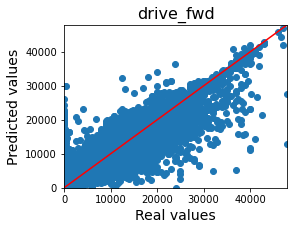

MSE on drive_other predictions is 4660.38681604204


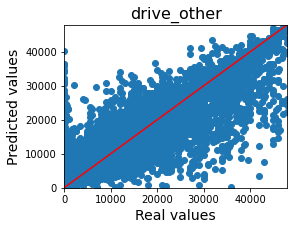

MSE on drive_rwd predictions is 4565.815001321891


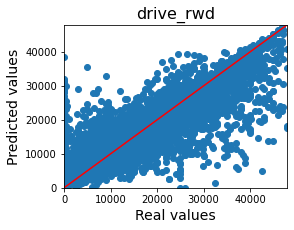

MSE on transmission_automatic predictions is 4351.835884120659


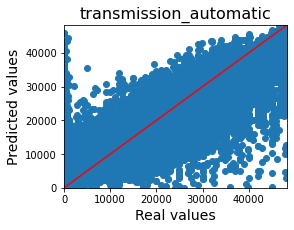

MSE on transmission_manual predictions is 5324.030108815511


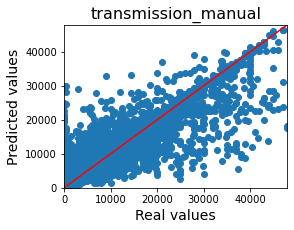

MSE on transmission_other predictions is 2625.878846888695


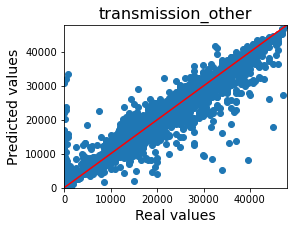

MSE on status_clean predictions is 4298.735258833505


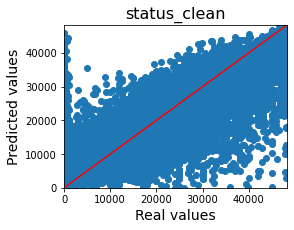

MSE on status_lien predictions is 6988.2988268317795


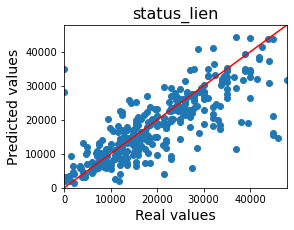

MSE on status_missing predictions is 4837.94162202848


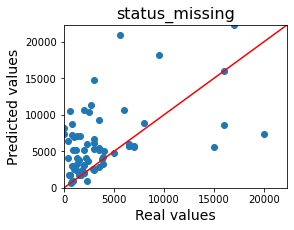

MSE on status_parts only predictions is 4211.349200028735


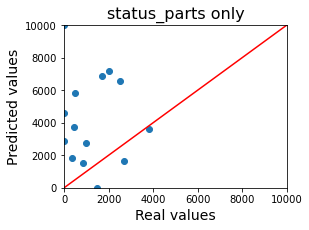

MSE on status_rebuilt predictions is 3681.666493285589


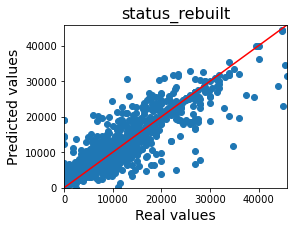

MSE on status_salvage predictions is 4019.3144239365215


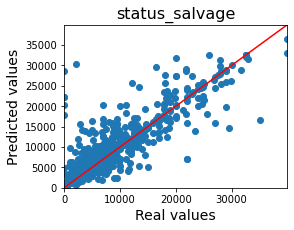

MSE on state_ak predictions is 4694.740688606792


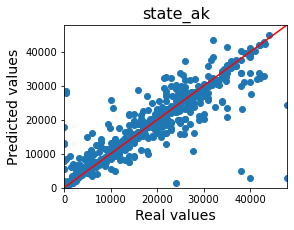

MSE on state_al predictions is 3699.051213564365


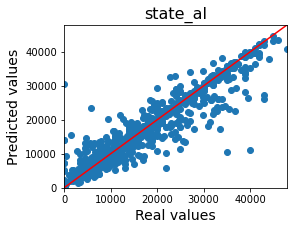

MSE on state_ar predictions is 3901.182107489071


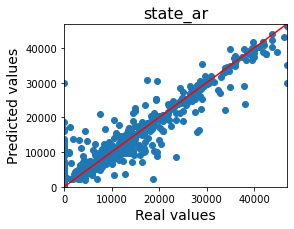

MSE on state_az predictions is 4853.757987630542


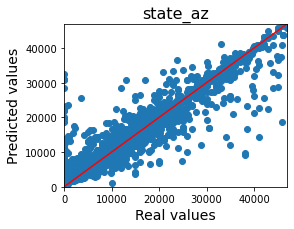

MSE on state_ca predictions is 4842.161979569228


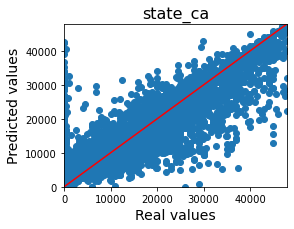

MSE on state_co predictions is 4663.687403821862


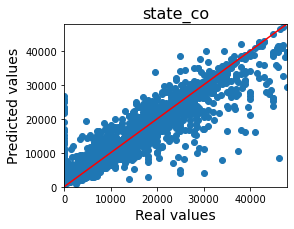

MSE on state_ct predictions is 3020.460929756787


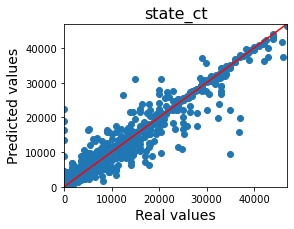

MSE on state_dc predictions is 4613.349537491775


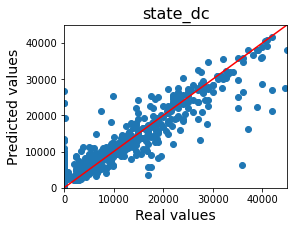

MSE on state_de predictions is 4301.823580598454


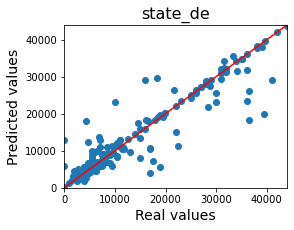

MSE on state_fl predictions is 3967.446950300684


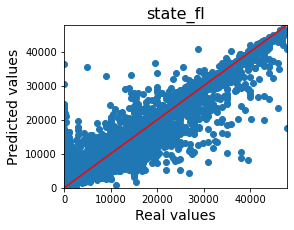

MSE on state_ga predictions is 4242.475329875148


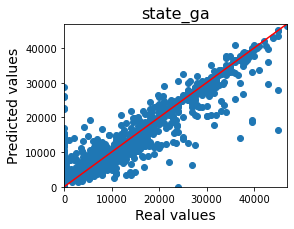

MSE on state_hi predictions is 6881.221538279257


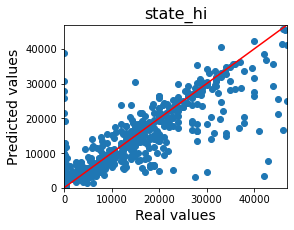

MSE on state_ia predictions is 3658.8091386971173


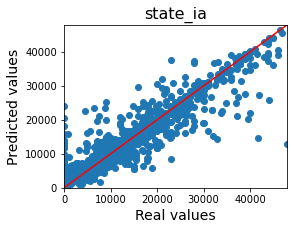

MSE on state_id predictions is 4977.914307468113


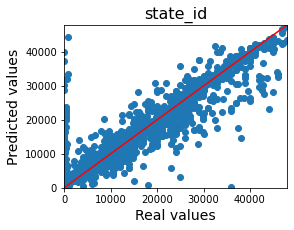

MSE on state_il predictions is 4364.986917524438


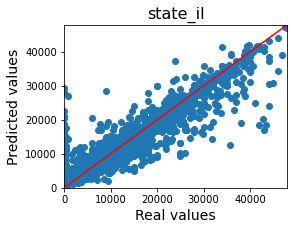

MSE on state_in predictions is 3603.7452170247825


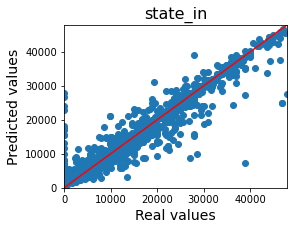

MSE on state_ks predictions is 3911.7778951385185


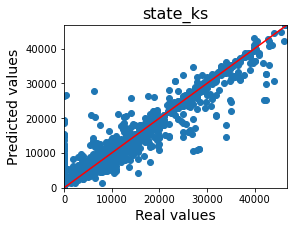

MSE on state_ky predictions is 3451.611329363115


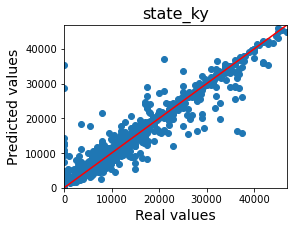

MSE on state_la predictions is 4820.267189780985


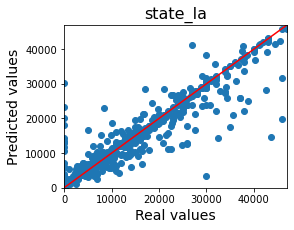

MSE on state_ma predictions is 3975.638411884061


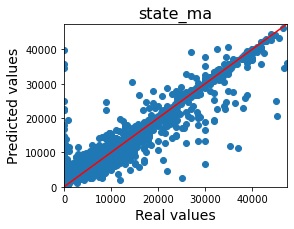

MSE on state_md predictions is 3992.564269178098


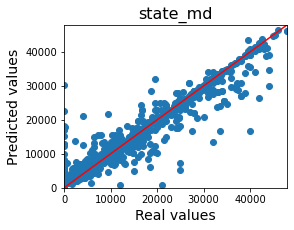

MSE on state_me predictions is 3507.461735139793


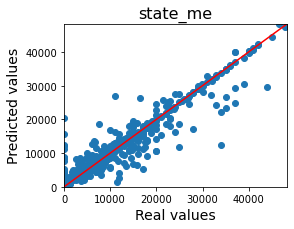

MSE on state_mi predictions is 3235.2810419113644


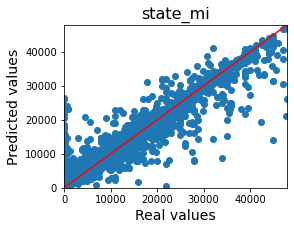

MSE on state_mn predictions is 4245.823877725214


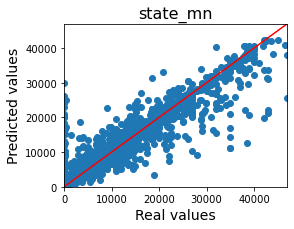

MSE on state_mo predictions is 3989.329827140699


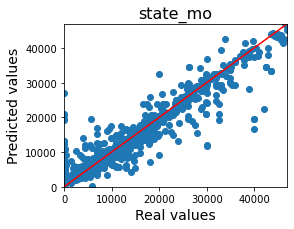

MSE on state_ms predictions is 2976.9238616825014


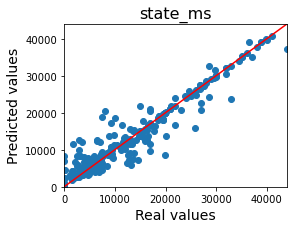

MSE on state_mt predictions is 2600.638759580005


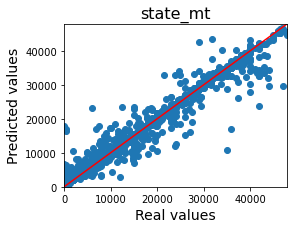

MSE on state_nc predictions is 4476.099598872954


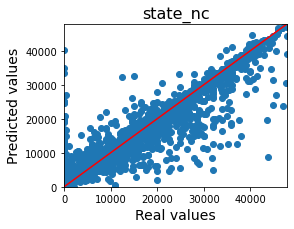

MSE on state_nd predictions is 3974.3924721721537


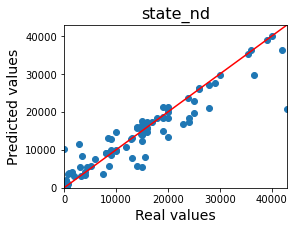

MSE on state_ne predictions is 2935.694452146452


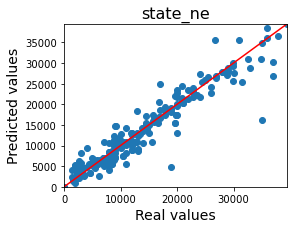

MSE on state_nh predictions is 4170.441375459147


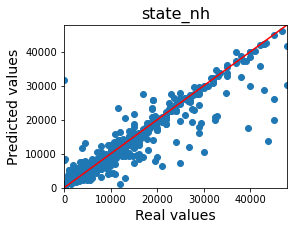

MSE on state_nj predictions is 4383.34735155138


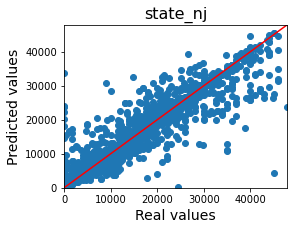

MSE on state_nm predictions is 4148.777613210969


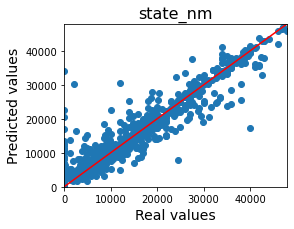

MSE on state_nv predictions is 3552.2903465840545


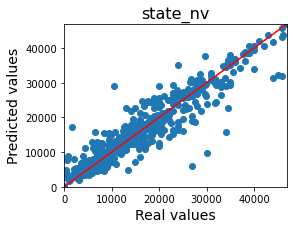

MSE on state_ny predictions is 3927.2220188577944


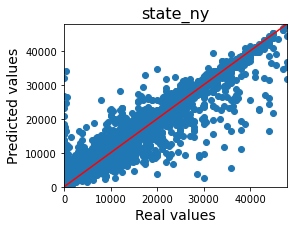

MSE on state_oh predictions is 3503.375165986861


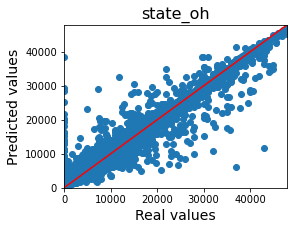

MSE on state_ok predictions is 4823.386824485646


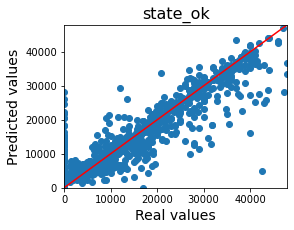

MSE on state_or predictions is 5426.346778559254


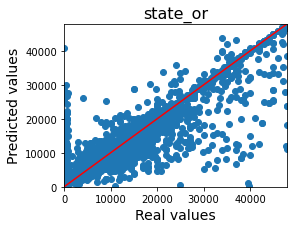

MSE on state_pa predictions is 3400.114381572911


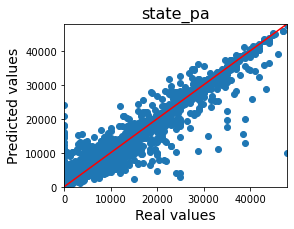

MSE on state_ri predictions is 3030.742345888793


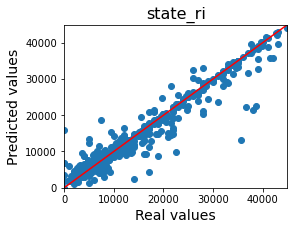

MSE on state_sc predictions is 3855.768793132286


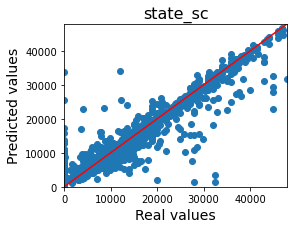

MSE on state_sd predictions is 3770.819794572218


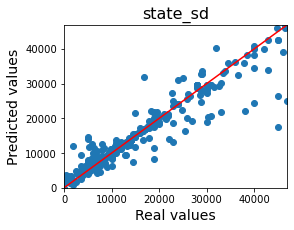

MSE on state_tn predictions is 3915.8624407455104


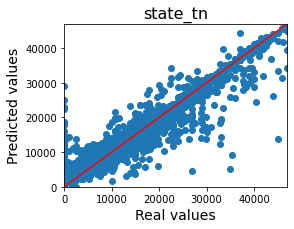

MSE on state_tx predictions is 4830.558327854194


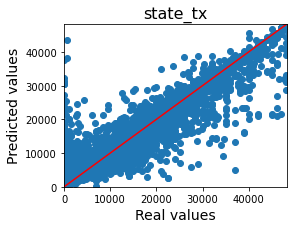

MSE on state_ut predictions is 3810.2273330368466


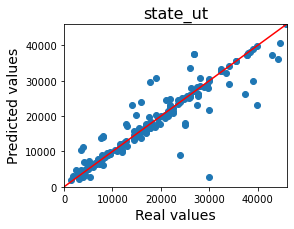

MSE on state_va predictions is 3789.2926023118566


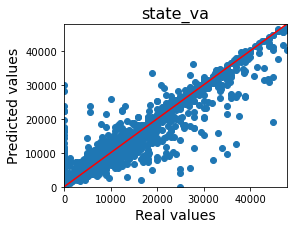

MSE on state_vt predictions is 3152.568189240772


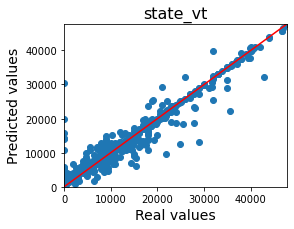

MSE on state_wa predictions is 6386.1892479961625


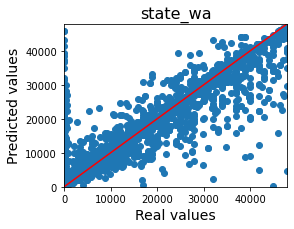

MSE on state_wi predictions is 3827.4779757650267


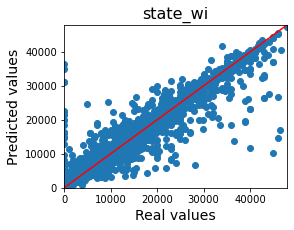

MSE on state_wv predictions is 4333.527904714635


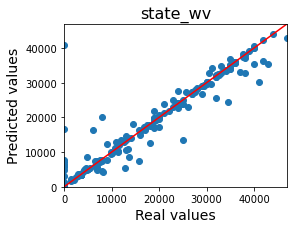

MSE on state_wy predictions is 4473.25259614553


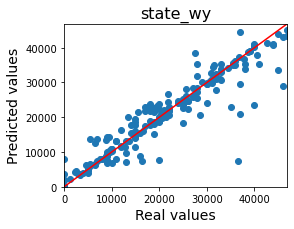

MSE on cylinders_4 cylinders predictions is 3025.971027884536


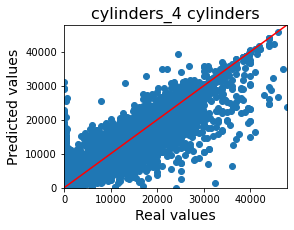

MSE on cylinders_6 cylinders predictions is 4116.74726803796


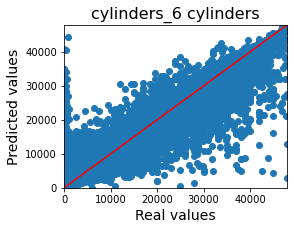

MSE on cylinders_8 cylinders predictions is 4945.070923949942


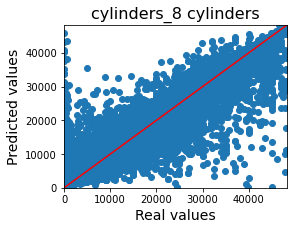

MSE on cylinders_missing predictions is 4756.9440505091525


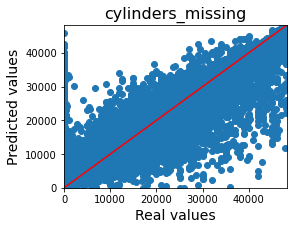

MSE on fuel_diesel predictions is 6299.904540293443


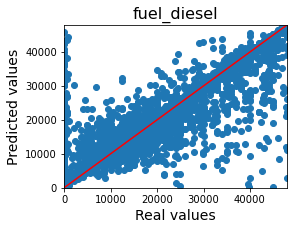

MSE on fuel_electric predictions is 4933.900080669046


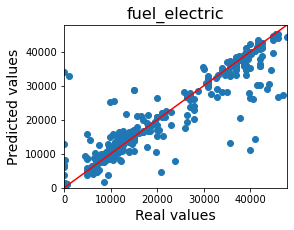

MSE on fuel_gas predictions is 4113.258088721787


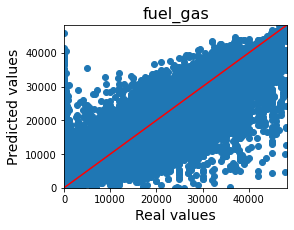

MSE on fuel_hybrid predictions is 3305.62284309321


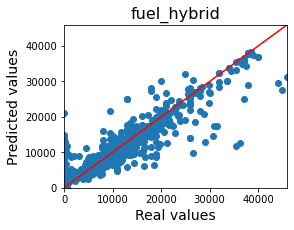

MSE on fuel_other predictions is 5190.792199108123


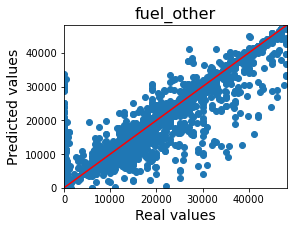

MSE on usage_type_daily predictions is 3861.771221499677


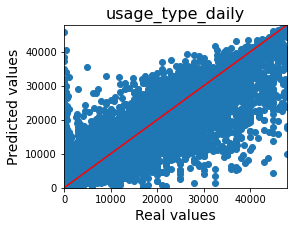

MSE on usage_type_missing predictions is 4693.172033003628


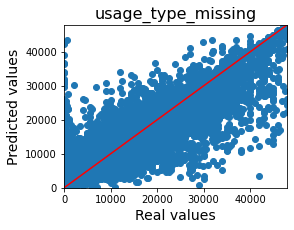

MSE on usage_type_other predictions is 3967.3590231678363


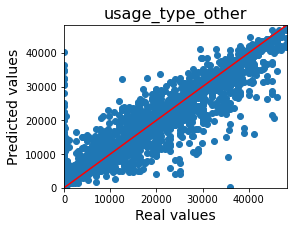

MSE on usage_type_professional predictions is 5017.400801377728


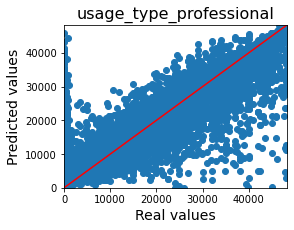

MSE on manuf_country_Germany predictions is 4405.270398516826


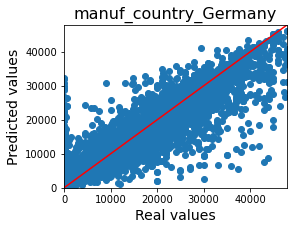

MSE on manuf_country_Italy predictions is 3364.1597529857027


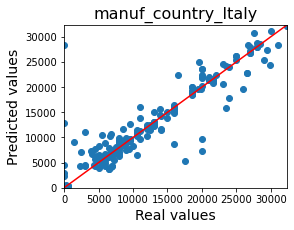

MSE on manuf_country_Japan predictions is 3653.064887211849


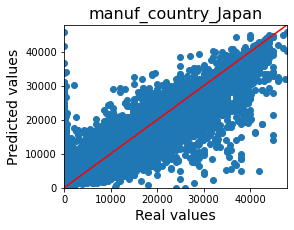

MSE on manuf_country_S.Korea predictions is 2758.3729108958587


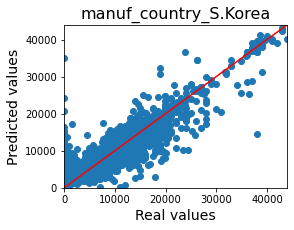

MSE on manuf_country_Sweden predictions is 3417.406144301227


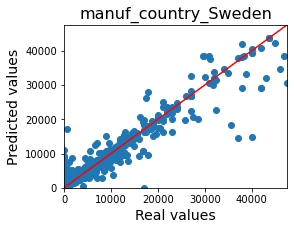

MSE on manuf_country_UK predictions is 4678.678282810912


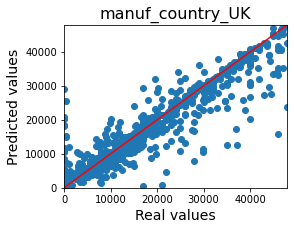

MSE on manuf_country_USA predictions is 4599.491545753157


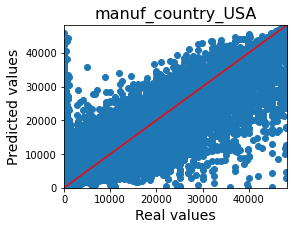

MSE on manuf_country_missing predictions is 6435.3783958511185


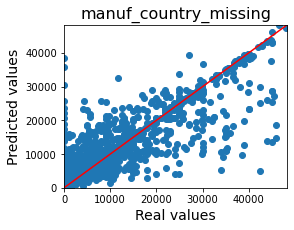

In [18]:
for col in mylist:
    
    cat_y, cat_pred=catPREDS(col)

    print(f"MSE on \033[1m{col}\033[0m predictions is {mean_squared_error(cat_y, cat_pred)**0.5}")
    
    plt.figure(figsize=(4,3))
    plt.xlim(0,max(np.amax(cat_y+1), np.amax(cat_pred+1)))
    plt.ylim(0,max(np.amax(cat_y+1), np.amax(cat_pred+1)))
    plt.plot([0,max(np.amax(cat_y+1), np.amax(cat_pred+1))],[0,max(np.amax(cat_y+1), np.amax(cat_pred+1))], c = "r")
    plt.scatter(cat_y,cat_pred)

    plt.xlabel("Real values", fontsize=14)
    plt.ylabel("Predicted values", fontsize=14)
    plt.title(f"{col}", fontsize=16)
    plt.show()
    


#state_or, state_wa, fuel_diesel

In general it mostly underestimates the higher priced cars and over estimte the cheap cars with real value aroud zero

# LGBM

In [14]:
import lightgbm as lgb

model=lgbmodel=lgb.LGBMRegressor(boosting_type="gbdt",  
                                objective="regression",
                                metric="mse",)

params={"learning_rate":[0.01, 0.05, 0.1, 0.5],
       "num_leaves":[100,500,1000,2000],
       "max_depth":[10,20,30,35,40, 45],
       "n_estimators":[100,200,500,1000, 1200]}

random_search = RandomizedSearchCV(model, param_distributions=params, scoring='neg_mean_squared_error', n_jobs=4, cv=5 )

random_search.fit(X_train, y_train)

print(random_search.best_params_)

RandomizedSearchCV(cv=5,
                   estimator=LGBMRegressor(metric='mse',
                                           objective='regression'),
                   n_jobs=4,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [10, 20, 30, 40],
                                        'n_estimators': [100, 200, 500, 1000],
                                        'num_leaves': [100, 500, 1000, 2000]},
                   scoring='neg_mean_squared_error')

In [15]:
random_search.best_params_

{'num_leaves': 2000,
 'n_estimators': 200,
 'max_depth': 30,
 'learning_rate': 0.1}

In [17]:
model=lgb.LGBMRegressor(learning_rate=0.1,
                        boosting_type="gbdt",  
                        objective="regression",
                        metric="mse",
                        num_leaves=2000,
                        max_depth=30,
                        n_estimators=1000)

model.fit(X_train, y_train)

preds_train=model.predict(X_train)
preds_test=model.predict(X_test)


print(f"MSE on train set: {mean_squared_error(y_train, preds_train)}")
print(f"RMSE on train set: {mean_squared_error(y_train, preds_train)**0.5}")
print()
print(f"MSE on test set:  {mean_squared_error(y_test, preds_test)}")
print(f"RMSE on test set:  {mean_squared_error(y_test, preds_test)**0.5}")

MSE on train set: 1474274.43095301
RMSE on train set: 1214.1970313557063

MSE on test set:  17750711.581710473
RMSE on test set:  4213.159334954053


MSE on train set: 1450707.5653418957
RMSE on train set: 1204.4532225627925

MSE on test set:  17791916.687488742
RMSE on test set:  4218.046548757937

In [13]:
from sklearn.model_selection import cross_val_score

model=lgb.LGBMRegressor(learning_rate=0.1,
                        boosting_type="gbdt",  
                        objective="regression",
                        metric="mse",
                        num_leaves=2000,
                        max_depth=40,
                        n_estimators=1000)

cv_score=cross_val_score(model, X, y, cv=5, scoring="neg_root_mean_squared_error")

print(cv_score)
print("RMSE CV:", -np.mean(cv_score))

[-6575.27742835 -5899.6527421  -5654.14243284 -6246.97119738
 -7012.66697976]
RMSE CV: 6277.742156086253


[-6575.27742835 -5899.6527421  -5654.14243284 -6246.97119738
 -7012.66697976]
RMSE CV: 6277.742156086253

In [9]:
#Set the lowest predicted value to zero (negative predicted values make no sense for price)
import copy

preds_train2 = copy.copy(preds_train)
preds_test2 = copy.copy(preds_test)

preds_train2[preds_train2 < 0] = 0
preds_test2[preds_test2 < 0] = 0

print(f"MSE on train set: {mean_squared_error(y_train, preds_train2)}")
print(f"RMSE on train set: {mean_squared_error(y_train, preds_train2)**0.5}")
print()
print(f"MSE on test set:  {mean_squared_error(y_test, preds_test2)}")
print(f"RMSE on test set:  {mean_squared_error(y_test, preds_test2)**0.5}")

MSE on train set: 1444229.6646083477
RMSE on train set: 1201.761068019907

MSE on test set:  17726394.436102573
RMSE on test set:  4210.272489531119


MSE on train set: 1444229.6646083477
RMSE on train set: 1201.761068019907

MSE on test set:  17726394.436102573
RMSE on test set:  4210.272489531119

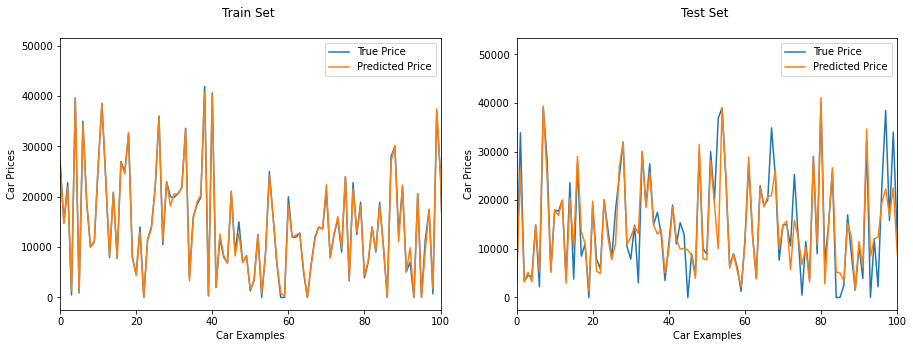

In [10]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].plot(np.arange(len(y_train)), y_train, label='True Price')
ax[0].plot(np.arange(len(preds_train2)), preds_train2, label='Predicted Price')
ax[0].set_title("Train Set \n")
ax[0].set_xlabel("Car Examples")
ax[0].set_ylabel("Car Prices")
ax[0].set_xlim(0,100)
#ax[0].set_ylim(0,35)
ax[0].legend()

ax[1].plot(np.arange(len(y_test)), y_test, label='True Price')
ax[1].plot(np.arange(len(preds_test2)), preds_test2, label='Predicted Price')
ax[1].set_title("Test Set \n")
ax[1].set_xlabel("Car Examples")
ax[1].set_ylabel("Car Prices")
ax[1].set_xlim(0,100)
#ax[1].set_ylim(0,35)
ax[1].legend()

plt.show()